## Objective
The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.



In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import re
import emoji
import autocorrect ## Has to be installed
from textblob import TextBlob ## Has to be installed
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
## nltk.download('punkt')
from nltk.corpus import stopwords
## nltk.download('stopwords')
from nltk.stem import PorterStemmer,WordNetLemmatizer,LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from warnings import filterwarnings
filterwarnings("ignore")
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,ConfusionMatrixDisplay

C:\Users\RATNADEEP\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Loading the dataset
df = pd.read_csv("data.csv")
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [3]:
df.shape

(8518, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


## Text Preprocessing

In [5]:
# Checking Missing values
df.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [6]:
df['Month'].fillna(df['Month'].mode()[0], inplace=True)
df['Place of Review'].fillna(df['Place of Review'].mode()[0], inplace=True)
df['Down Votes'].fillna(df['Down Votes'].mean(), inplace=True)
df['Up Votes'].fillna(df['Up Votes'].mean(), inplace=True)

In [7]:
# Drop rows with NaN values in the 'Review text' column
df.dropna(subset=['Review text'],inplace=True)
df.dropna(subset=['Reviewer Name'],inplace=True)
df.dropna(subset=['Review Title'],inplace=True)

In [8]:
df.isna().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64

In [9]:
# Checking duplicates 
df.duplicated().sum()

0

In [18]:
#Converting to lower case
df['Review text']=df['Review text'].str.lower()

In [12]:
df['Review text'].head()

0    nice product, good quality, but price is now r...
1    they didn't supplied yonex mavis 350. outside ...
2    worst product. damaged shuttlecocks packed in ...
3    quite o. k. , but nowadays  the quality of the...
4    over pricedjust â?¹620 ..from retailer.i didn'...
Name: Review text, dtype: object

In [25]:

import emoji

# Define a function to remove emojis from a text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply the function to the 'Review text' column
df['Review text'] = df['Review text'].apply(remove_emojis)




In [21]:

# Define a function to convert text to lowercase
def convert_to_lower(text):
    return text.lower()

# Apply the function to the 'Review text' column
df['Review text'] = df['Review text'].apply(convert_to_lower)


In [26]:
df['Review text'].head(2)

0    nice product, good quality, but price is now r...
1    they didn't supplied yonex mavis 350. outside ...
Name: Review text, dtype: object

## Tokenization

In [27]:
df['Review text'] = df['Review text'].apply(lambda x: " ".join(word_tokenize(x)))

In [28]:
df.head(2)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"nice product , good quality , but price is now...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,they did n't supplied yonex mavis 350. outside...,1


## Removing Punctuation marks and Numbers

In [31]:
import pandas as pd
import re

def remove_punctuation_and_numbers(text):
    # Remove punctuation and numbers using regular expressions
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    
    return text

# Assuming df is your DataFrame and 'Review text' is the column name
df['Review text'] = df['Review text'].apply(lambda x: remove_punctuation_and_numbers(x))



In [33]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,nice product good quality but price is now r...,4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,they did nt supplied yonex mavis outside cove...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,worst product damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,Oct 2020,quite o k but nowadays the quality of the cor...,3
4,ASHIK P A,Over priced,"Certified Buyer, Bengaluru",147.0,24.0,Apr 2016,over pricedjust â ¹ from retaileri did nt un...,1
...,...,...,...,...,...,...,...,...
8503,darwin,Yones Mavis 350 Blue cap,"Certified Buyer, Bengaluru",2.0,0.0,Apr 2016,wrost and duplicate productdo nt buy this sell...,1
8504,naresh g,For Mavis350,"Certified Buyer, Bengaluru",2.0,1.0,Aug 2016,received product intact and sealedread more,5
8505,MD. Jabbar,Very Good,"Certified Buyer, Bengaluru",1.0,0.0,Sep 2016,delivered before time but price is high from m...,3
8506,Abani Behera,Don't waste your money,"Certified Buyer, Bengaluru",0.0,2.0,Sep 2016,up to the mark but same is available in market...,4


## Removing the Stopwords

In [34]:
sw = stopwords.words('english')

In [35]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
df['Review text'] = df['Review text'].str.replace('â','a')
df['Review text'] = df['Review text'].str.replace('¹','')

In [37]:
df['Review text']

0       nice product  good quality  but price is now r...
1       they did nt supplied yonex mavis  outside cove...
2       worst product  damaged shuttlecocks packed in ...
3       quite o k  but nowadays the quality of the cor...
4       over pricedjust a    from retaileri did nt und...
                              ...                        
8503    wrost and duplicate productdo nt buy this sell...
8504          received product intact and sealedread more
8505    delivered before time but price is high from m...
8506    up to the mark but same is available in market...
8507                         nice delivery speedread more
Name: Review text, Length: 8508, dtype: object

In [38]:


def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in sw]
    
    # Join the filtered tokens back into a single string
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

# Assuming df is your DataFrame and 'Review text' is the column name
df['Review text'] = df['Review text'].apply(remove_stopwords)



In [39]:
df['Review text']

0       nice product good quality price rising bad sig...
1       nt supplied yonex mavis outside cover yonex ad...
2       worst product damaged shuttlecocks packed new ...
3       quite k nowadays quality corks like years back...
4       pricedjust retaileri nt understand wat advanta...
                              ...                        
8503    wrost duplicate productdo nt buy seller produc...
8504                   received product intact sealedread
8505                 delivered time price high marketread
8506                 mark available market less priceread
8507                              nice delivery speedread
Name: Review text, Length: 8508, dtype: object

## Text Normalization

In [40]:
lemma=WordNetLemmatizer()

In [46]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

def lemmatizer(text):
    lemmatized_words = [lemma.lemmatize(word) for word in text.split()]
    return " ".join(lemmatized_words)

# Assuming yonex is your DataFrame and 'Review text' is the column name
df['Review text'] = df['Review text'].apply(lemmatizer)


In [47]:
df['Review text']

0       nice product good quality price rising bad sig...
1       nt supplied yonex mavis outside cover yonex ad...
2       worst product damaged shuttlecock packed new b...
3       quite k nowadays quality cork like year back u...
4       pricedjust retaileri nt understand wat advanta...
                              ...                        
8503    wrost duplicate productdo nt buy seller produc...
8504                   received product intact sealedread
8505                 delivered time price high marketread
8506                   mark available market le priceread
8507                              nice delivery speedread
Name: Review text, Length: 8508, dtype: object

In [48]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,nice product good quality price rising bad sig...,4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,nt supplied yonex mavis outside cover yonex ad...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,worst product damaged shuttlecock packed new b...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,Oct 2020,quite k nowadays quality cork like year back u...,3
4,ASHIK P A,Over priced,"Certified Buyer, Bengaluru",147.0,24.0,Apr 2016,pricedjust retaileri nt understand wat advanta...,1
...,...,...,...,...,...,...,...,...
8503,darwin,Yones Mavis 350 Blue cap,"Certified Buyer, Bengaluru",2.0,0.0,Apr 2016,wrost duplicate productdo nt buy seller produc...,1
8504,naresh g,For Mavis350,"Certified Buyer, Bengaluru",2.0,1.0,Aug 2016,received product intact sealedread,5
8505,MD. Jabbar,Very Good,"Certified Buyer, Bengaluru",1.0,0.0,Sep 2016,delivered time price high marketread,3
8506,Abani Behera,Don't waste your money,"Certified Buyer, Bengaluru",0.0,2.0,Sep 2016,mark available market le priceread,4


## Numerical Feature Extraction

In [49]:
vector = CountVectorizer()

In [51]:
vector.fit_transform(df['Review text']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

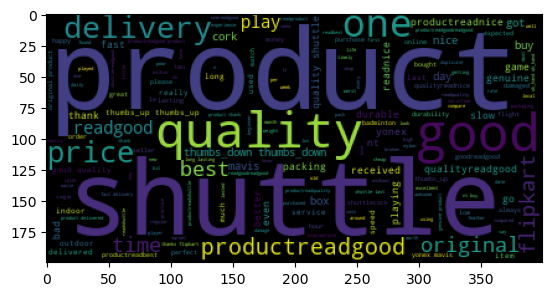

In [52]:
text = "".join(df['Review text'].values.tolist())
data=WordCloud().generate(text)
plt.imshow(data)

In [53]:
SA = SentimentIntensityAnalyzer()

In [54]:
def polarity(x):
    return SA.polarity_scores(x)['compound']

In [55]:
df['Emotion'] = df['Review text'].apply(polarity)

In [58]:
def sentiment(x):
    if x > 0:
        return 'Positive'
    elif x < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [59]:
df['Emotion'] = df['Emotion'].apply(sentiment)

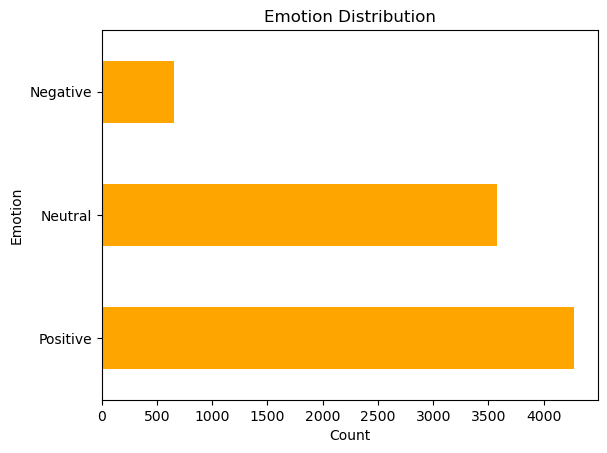

In [61]:
import matplotlib.pyplot as plt

# Assuming yonex is your DataFrame and 'Emotion' is the column name
df['Emotion'].value_counts().plot(kind='barh', color='orange')  # Horizontal bar plot
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.title('Emotion Distribution')
plt.show()


In [63]:
data = pd.concat([df['Review text'],df['Emotion']],axis=1)

In [65]:
data.head(5)

,Review text,Emotion
0,nice product good quality price rising bad sig...,Positive
1,nt supplied yonex mavis outside cover yonex ad...,Negative
2,worst product damaged shuttlecock packed new b...,Negative
3,quite k nowadays quality cork like year back u...,Positive
4,pricedjust retaileri nt understand wat advanta...,Positive


In [66]:
df['Emotion'].value_counts()

Emotion
Positive    4276
Neutral     3574
Negative     658
Name: count, dtype: int64

## Identify Input and Output

In [67]:
X=df['Review text']
y=df['Emotion']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [69]:
pipe = Pipeline([('Vectorization',CountVectorizer(stop_words='english')),
              ("Estimator",MultinomialNB(alpha=3))])

In [70]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Vectorization', CountVectorizer(stop_words='english')),
                ('Estimator', MultinomialNB(alpha=3))])

In [71]:
y_pred = pipe.predict(X_test)

In [72]:
accuracy_score(y_test,y_pred)

0.8744710860366713

In [73]:
f1_score(y_test, y_pred, average='weighted')

0.8719487020156033

## Creating a pickle file

In [75]:
import pickle

In [76]:
pickle.dump(pipe,open("sentiment.pkl",'wb'))

In [77]:
import os

In [78]:
os.getcwd()

'C:\\Users\\RATNADEEP\\INTERNSHIP DS'

In [79]:
predict = pickle.load(open("sentiment.pkl",'rb'))

In [80]:
predict.predict([" very nice product"])

array(['Positive'], dtype='<U8')

In [81]:
predict.predict(["such a bad product please don't buy"])

array(['Negative'], dtype='<U8')